In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/frame-478/frame_478.jpg


1.Loading and Reading the Image:
Input format: Determine the format of the image (e.g., JPEG, PNG, BMP).
Library: Use a suitable library like OpenCV, PIL (Python Imaging Library), or scikit-image to load and read the image data.

2. Converting to Grayscale (if necessary):
Color channels: If the image is in color, convert it to grayscale to reduce dimensionality and simplify processing.

Algorithms: Use algorithms like averaging or weighted averaging to convert color pixels to grayscale values.

3. Resizing:
Uniform size: Resize the image to a consistent size for batch processing or algorithm compatibility.
Aspect ratio: Maintain the aspect ratio to avoid distortion.
Interpolation: Use interpolation methods like nearest neighbor, bilinear, or bicubic to fill in pixel values during resizing.

4. Cropping:
Focus on region of interest: Crop the image to focus on the relevant region.
Center cropping: Crop around the center of the image.
Random cropping: Crop random regions for data augmentation.

5. Normalization:
Scaling: Scale pixel values to a specific range (e.g., 0-1 or -1 to 1) for numerical stability.
Mean and standard deviation: Normalize pixel values using the mean and standard deviation of the dataset.

6. Data Augmentation:
Increase dataset size: Apply transformations to create new, varied images.
Techniques to use: include flipping, rotation, shearing, zooming, and adding noise.

7. Noise Reduction:
Remove noise: Apply one of the filters to reduce noise: Gaussian blur or median filtering or bilateral filtering.



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [28]:
#Loading and Reading the Image
image_path = '/kaggle/input/frame-478/frame_478.jpg'
image=cv2.imread(image_path)
image_format = image_path.split('.')[-1]
print(f"image format:{image_format}")

image format:jpg


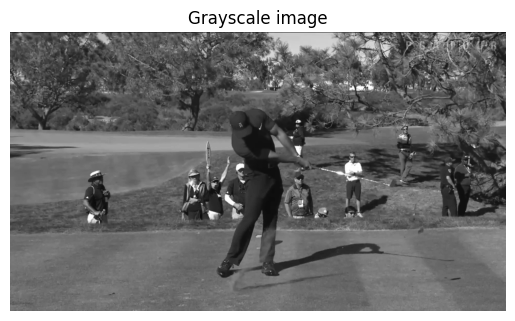

In [5]:
#Converting to Grayscale
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap ='gray')
plt.title('Grayscale image')
plt.axis('off')
plt.show()

In [6]:
#Resizing: Uniform size
desired_width = 400
aspect_ratio = image.shape[1]/image.shape[0]
new_height = int(desired_width/aspect_ratio)

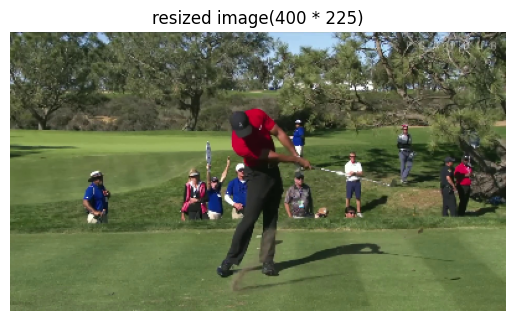

In [7]:
resized_image =cv2.resize(image,(desired_width, new_height), interpolation= cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title(f'resized image(400 * {new_height})')
plt.axis('off')
plt.show()

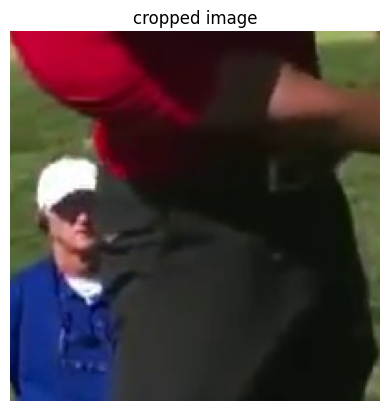

In [8]:
#cropping the image

crop_size = 200
center_x, center_y = image.shape[1]//2,image.shape[0]//2
cropped_image=image[center_y - crop_size//2:center_y + crop_size//2,
                    center_x - crop_size//2:center_x + crop_size//2
                   ]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('cropped image')
plt.axis('off')
plt.show()

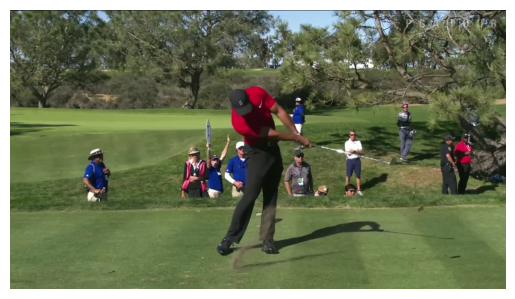

In [18]:
#normalizing the image
normalized_image = image/255.0
normalized_image_uint8=(normalized_image*255).astype(np.uint8)
plt.imshow(cv2.cvtColor(normalized_image_uint8, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

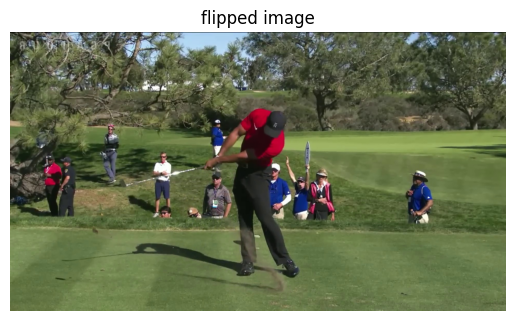

In [11]:
#augmentation = horizontal flipping
flipped_image = cv2.flip(image,1)
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
plt.title('flipped image')
plt.axis('off')
plt.show()

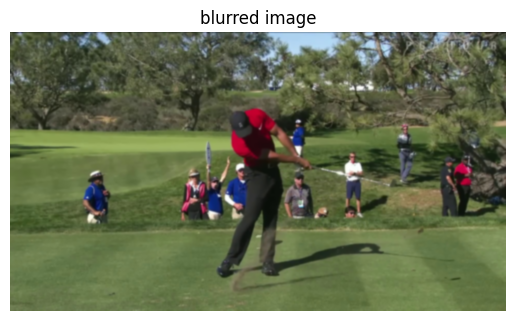

In [27]:
#noise_reduction
blurred_image = cv2.GaussianBlur(image,(15,15),0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('blurred image')
plt.axis('off')
plt.show()